In [9]:
import math 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

### binom test

In [3]:
n = 1000
p = 0.001
threshold = 0.05

satisfying_data = []

for c in range(n+1):
    cumulative_prob = sum(math.comb(n, k) * (p ** k) * ((1 - p) ** (n - k)) for k in range(c+1))
    if 1 - cumulative_prob <= threshold:
        satisfying_data.append((c, 1 - cumulative_prob))

df = pd.DataFrame(satisfying_data, columns=['c', 'probability'])

print(df)

        c   probability
0       3  1.892683e-02
1       4  3.636878e-03
2       5  5.880701e-04
3       6  8.197002e-05
4       7  1.003187e-05
..    ...           ...
993   996  7.771561e-16
994   997  7.771561e-16
995   998  7.771561e-16
996   999  7.771561e-16
997  1000  7.771561e-16

[998 rows x 2 columns]


In [4]:
n = 1000
p = 0.001

all_data = []

for c in range(n+1):
    cumulative_prob = sum(math.comb(n, k) * (p ** k) * ((1 - p) ** (n - k)) for k in range(c+1))
    all_data.append((c, 1 - cumulative_prob))

df = pd.DataFrame(all_data, columns=['c', 'probability'])

print(df)

         c   probability
0        0  6.323046e-01
1        1  2.642411e-01
2        2  8.020934e-02
3        3  1.892683e-02
4        4  3.636878e-03
...    ...           ...
996    996  7.771561e-16
997    997  7.771561e-16
998    998  7.771561e-16
999    999  7.771561e-16
1000  1000  7.771561e-16

[1001 rows x 2 columns]


In [5]:
8.020934e-02

0.08020934

In [6]:
1.892683e-02

0.01892683

In [126]:
n = 1000
c = 3

results = []
probabilities = []

for p in np.arange(0.002, 0.01, 0.0001):
    cumulative_prob = sum(math.comb(n, k) * (p ** k) * ((1 - p) ** (n - k)) for k in range(c + 1))
    results.append(cumulative_prob)
    probabilities.append(p)

df = pd.DataFrame({'Results': results, 'Probabilities': probabilities})

df

,Results,Probabilities
0,0.857304,0.0020
1,0.838822,0.0021
2,0.819526,0.0022
3,0.799511,0.0023
4,0.778874,0.0024
...,...,...
75,0.014531,0.0095
76,0.013511,0.0096
77,0.012559,0.0097
78,0.011672,0.0098


In [105]:
import matplotlib as mpl
mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams["font.style"] = "normal"

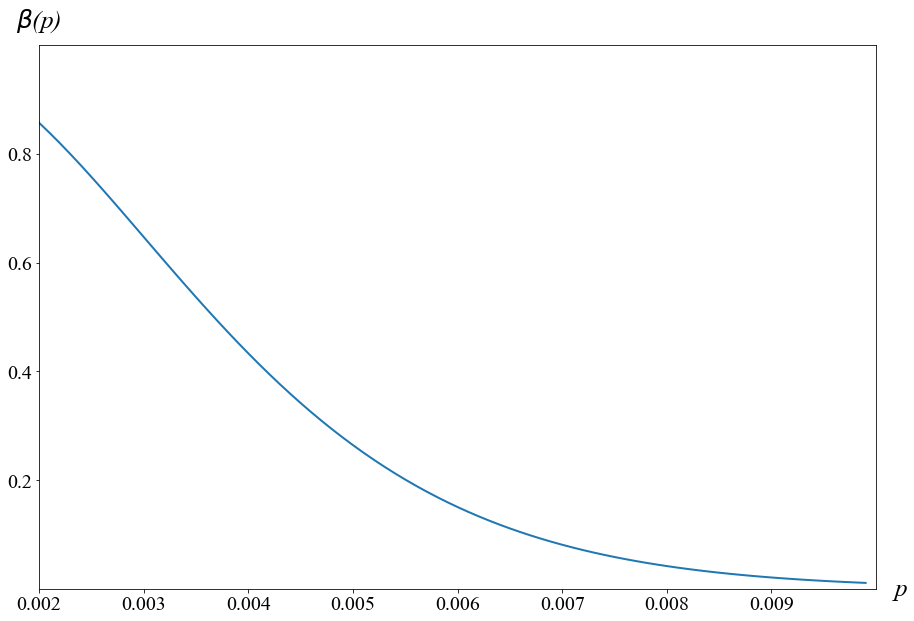

In [167]:
plt.figure(figsize = (15, 10))
plt.plot(np.arange(0.002, 0.01, 0.0001), df["Results"], linewidth = 2)
plt.xlim([.002, .01])
plt.ylim([0, 1])
plt.xticks(list(np.arange(.002, .01, .001)), fontsize = 20)
plt.yticks(list(np.arange(.2, 1, .2)), fontsize = 20)
plt.xlabel("p", fontsize = 25, labelpad = 30, fontstyle = "italic")
plt.ylabel(r"$\beta$(p)", fontsize = 25, rotation = 360, labelpad = 50, fontstyle = "italic")
plt.gca().yaxis.set_label_coords(0, 1.02)
plt.gca().xaxis.set_label_coords(1.03, .02)
#plt.title('B(3, 1000, p) Results')
plt.show()

### simmulation approach

In [10]:
p0 = 0.001
p1 = 0.002
n0 = 1000

In [11]:
r = 100000

frequencies_1 = []

for i in range(r):
    sample = np.random.binomial(1, p0, n0)
    ps = sum(sample) / len(sample)
    frequencies_1.append(ps)

In [12]:
frequencies_1 = pd.Series(frequencies_1)
frequencies_1

0        0.001
1        0.000
2        0.002
3        0.000
4        0.001
         ...  
99995    0.001
99996    0.000
99997    0.001
99998    0.002
99999    0.000
Length: 100000, dtype: float64

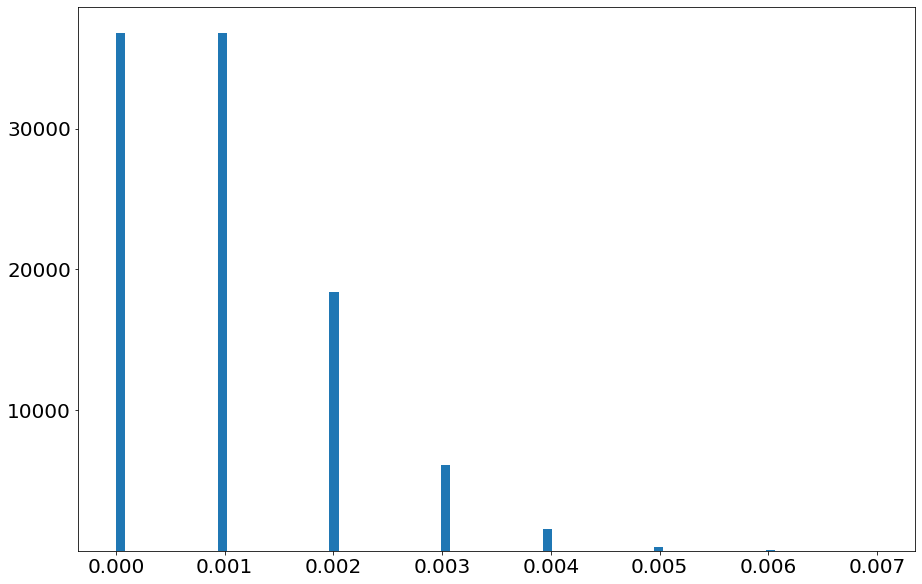

In [13]:
plt.figure(figsize = (15, 10))
plt.hist(frequencies_1, bins = "auto")
plt.xticks(fontsize = 20)
plt.yticks(list(np.arange(10000, 40000, 10000)), fontsize = 20)
plt.show()

In [14]:
alpha = 0.05            # significance level 

In [15]:
c = frequencies_1.quantile(1 - alpha)      # critical value 
c

0.003

In [16]:
r = 100000

frequencies_2 = []

for i in range(r):
    sample = np.random.binomial(1, p1, n0)
    ps = sum(sample) / len(sample)
    frequencies_2.append(ps)

In [17]:
frequencies_2 = pd.Series(frequencies_2)
frequencies_2

0        0.003
1        0.002
2        0.001
3        0.003
4        0.001
         ...  
99995    0.001
99996    0.003
99997    0.002
99998    0.000
99999    0.003
Length: 100000, dtype: float64

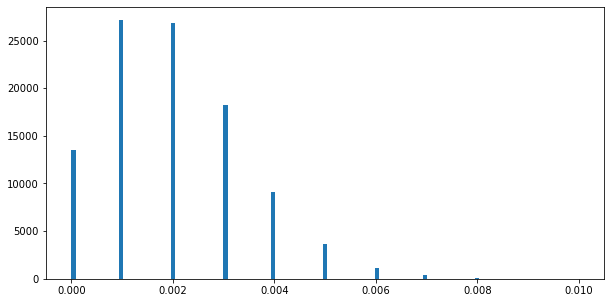

In [18]:
plt.figure(figsize = (10, 5))
plt.hist(frequencies_2, bins = "auto")
plt.show()

In [19]:
c

0.003

In [20]:
frequencies_2[frequencies_2 <= c]

0        0.003
1        0.002
2        0.001
3        0.003
4        0.001
         ...  
99995    0.001
99996    0.003
99997    0.002
99998    0.000
99999    0.003
Length: 85676, dtype: float64

In [27]:
# type II error estimate 
b = len(frequencies_2[frequencies_2 <= c]) / len(frequencies_2)
b

0.85676

In [23]:
r = 100000

frequencies_3 = []

for i in range(r):
    sample = np.random.binomial(1, p0, n0)
    ps = sum(sample) / len(sample)
    frequencies_3.append(ps)

In [24]:
frequencies_3 = pd.Series(frequencies_3)
frequencies_3

0        0.002
1        0.001
2        0.001
3        0.000
4        0.001
         ...  
99995    0.001
99996    0.000
99997    0.002
99998    0.001
99999    0.002
Length: 100000, dtype: float64

In [26]:
# type I error estimate 
a = len(frequencies_3[frequencies_3 > c]) / len(frequencies_3)
a

0.01896